# Robust Scaler

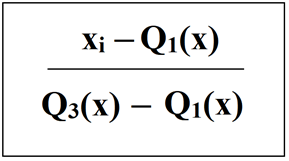

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('covid_toy.csv')
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,No
96,51,Female,101.0,Strong,Kolkata,Yes
97,20,Female,101.0,Mild,Bangalore,No
98,5,Female,98.0,Strong,Mumbai,No


In [3]:
df['has_covid'] = df['has_covid'].map({'No':0,'Yes':1})

In [4]:
df

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,0
1,27,Male,100.0,Mild,Delhi,1
2,42,Male,101.0,Mild,Delhi,0
3,31,Female,98.0,Mild,Kolkata,0
4,65,Female,101.0,Mild,Mumbai,0
...,...,...,...,...,...,...
95,12,Female,104.0,Mild,Bangalore,0
96,51,Female,101.0,Strong,Kolkata,1
97,20,Female,101.0,Mild,Bangalore,0
98,5,Female,98.0,Strong,Mumbai,0


In [5]:
df = df.drop(['city','gender'],axis=1)

In [6]:
df

,age,fever,cough,has_covid
0,60,103.0,Mild,0
1,27,100.0,Mild,1
2,42,101.0,Mild,0
3,31,98.0,Mild,0
4,65,101.0,Mild,0
...,...,...,...,...
95,12,104.0,Mild,0
96,51,101.0,Strong,1
97,20,101.0,Mild,0
98,5,98.0,Strong,0


In [7]:
df['cough'].value_counts()

Mild      62
Strong    38
Name: cough, dtype: int64

In [8]:
df['cough'] = df['cough'].map({'Mild':0,'Strong':1})
df

,age,fever,cough,has_covid
0,60,103.0,0,0
1,27,100.0,0,1
2,42,101.0,0,0
3,31,98.0,0,0
4,65,101.0,0,0
...,...,...,...,...
95,12,104.0,0,0
96,51,101.0,1,1
97,20,101.0,0,0
98,5,98.0,1,0


In [9]:
df

,age,fever,cough,has_covid
0,60,103.0,0,0
1,27,100.0,0,1
2,42,101.0,0,0
3,31,98.0,0,0
4,65,101.0,0,0
...,...,...,...,...
95,12,104.0,0,0
96,51,101.0,1,1
97,20,101.0,0,0
98,5,98.0,1,0


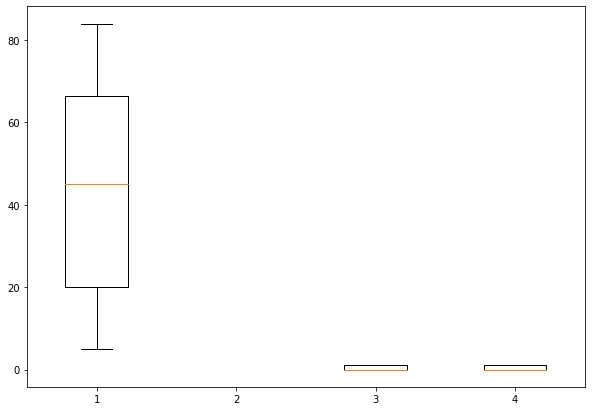

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize =(10, 7))
plt.boxplot(df)
plt.show()

In [12]:
X = df.drop('has_covid',axis=1)
y = df['has_covid']

In [14]:
from sklearn.preprocessing import RobustScaler

In [15]:
rb = RobustScaler()

In [16]:
X_rb = rb.fit_transform(X)

In [17]:
X_rb

array([[ 0.32258065,  0.53333333,  0.        ],
       [-0.38709677, -0.26666667,  0.        ],
       [-0.06451613,  0.        ,  0.        ],
       [-0.30107527, -0.8       ,  0.        ],
       [ 0.43010753,  0.        ,  0.        ],
       [ 0.83870968,         nan,  0.        ],
       [-0.66666667,  0.        ,  1.        ],
       [-0.53763441,         nan,  1.        ],
       [-0.55913978, -0.26666667,  1.        ],
       [ 0.40860215,  0.        ,  0.        ],
       [ 0.64516129,         nan,  0.        ],
       [ 0.43010753, -0.8       ,  0.        ],
       [-0.43010753, -0.53333333,  1.        ],
       [ 0.40860215,  0.26666667,  0.        ],
       [ 0.12903226,  0.8       ,  0.        ],
       [ 0.53763441,  0.53333333,  1.        ],
       [ 0.51612903,  0.53333333,  0.        ],
       [-0.10752688, -0.8       ,  1.        ],
       [ 0.40860215, -0.8       ,  0.        ],
       [-0.06451613,         nan,  1.        ],
       [-0.70967742, -0.8       ,  1.   

In [20]:
X[["age","fever","cough"]] = X_rb

In [21]:
X

,age,fever,cough
0,0.322581,0.533333,0.0
1,-0.387097,-0.266667,0.0
2,-0.064516,0.000000,0.0
3,-0.301075,-0.800000,0.0
4,0.430108,0.000000,0.0
...,...,...,...
95,-0.709677,0.800000,0.0
96,0.129032,0.000000,1.0
97,-0.537634,0.000000,0.0
98,-0.860215,-0.800000,1.0


In [22]:
X.describe()

,age,fever,cough
count,100.000000,90.000000,100.000000
mean,-0.016774,-0.041481,0.380000
std,0.535031,0.547980,0.487832
min,-0.860215,-0.800000,0.000000
25%,-0.537634,-0.533333,0.000000
50%,0.000000,0.000000,0.000000
75%,0.462366,0.466667,1.000000
max,0.838710,0.800000,1.000000


In [23]:
X.describe().round()

,age,fever,cough
count,100.0,90.0,100.0
mean,-0.0,-0.0,0.0
std,1.0,1.0,0.0
min,-1.0,-1.0,0.0
25%,-1.0,-1.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,1.0
max,1.0,1.0,1.0
